In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import warnings

# Define the start and end dates
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2022, 1, 5)
symbol = 'AXISBANK.NS'

# Fetch stock data
stk_data = yf.download(symbol, start=start, end=end)
stk_data = stk_data[['Open', 'High', 'Low', 'Close']]

[*********************100%%**********************]  1 of 1 completed


In [2]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-06-01,753.549988,754.000000,741.150024,745.150024
2021-06-02,744.799988,745.299988,734.200012,737.000000
2021-06-03,743.000000,752.250000,739.000000,750.650024
2021-06-04,751.000000,759.900024,740.099976,742.049988
2021-06-07,743.099976,753.950012,741.500000,751.099976
...,...,...,...,...
2021-12-29,674.500000,679.599976,667.250000,670.500000
2021-12-30,668.000000,673.099976,664.500000,668.849976
2021-12-31,672.950012,686.500000,671.200012,678.549988


In [3]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(stk_data)
data_normalized = pd.DataFrame(data_normalized, columns=["Open", "High", "Low", "Close"])

# Split data into train and test sets
test_obs = 29
train = data_normalized[:-test_obs]
test = data_normalized[-test_obs:]

In [5]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(stk_data)
data_normalized = pd.DataFrame(data_normalized, columns=["Open", "High", "Low", "Close"])
data_normalized

,Open,High,Low,Close
0,0.526696,0.439563,0.524937,0.484794
1,0.483034,0.396376,0.485771,0.442784
2,0.474052,0.430876,0.512820,0.513145
3,0.513972,0.468851,0.519019,0.468814
4,0.474551,0.439315,0.526909,0.515464
...,...,...,...,...
145,0.132236,0.070241,0.108481,0.100000
146,0.099800,0.037974,0.092984,0.091495
147,0.124501,0.104492,0.130741,0.141495
148,0.160928,0.164060,0.174697,0.233247


In [6]:
test_obs = 29
train = data_normalized[:-test_obs]
test = data_normalized[-test_obs:]

In [7]:
warnings.filterwarnings("ignore")

In [8]:
for i in range(1, 11):
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  -28.254436064913655
BIC:  -27.789854107783313

Order = 2
AIC:  -28.38620471945858
BIC:  -27.54546147784501

Order = 3
AIC:  -28.20471860053642
BIC:  -26.983738935517653

Order = 4
AIC:  -28.0585465965717
BIC:  -26.453180548996933

Order = 5
AIC:  -27.8592578265481
BIC:  -25.865278722643488

Order = 6
AIC:  -27.8736999949723
BIC:  -25.486802492047733

Order = 7
AIC:  -27.75342949857964
BIC:  -24.969227568634363

Order = 8
AIC:  -27.72991884773954
BIC:  -24.54394369667734

Order = 9
AIC:  -27.548216543540125
BIC:  -23.955914463614462

Order = 10
AIC:  -27.514885621748427
BIC:  -23.511615774764437



In [11]:
selected_order = model.select_order(maxlags=12).selected_orders["aic"]
result = model.fit(selected_order)
result

In [12]:
lagged_values = train.values[-selected_order:]
forecast = result.forecast(y=lagged_values, steps=test_obs)
forecast_df = pd.DataFrame(forecast, columns=["Open", "High", "Low", "Close"])
forecast_df

,Open,High,Low,Close
0,0.184223,0.133338,0.178127,0.187376
1,0.197874,0.143687,0.201591,0.207998
2,0.215999,0.167402,0.234567,0.230542
3,0.237343,0.189127,0.262978,0.258001
4,0.264078,0.214019,0.290855,0.283272
5,0.288274,0.238463,0.318556,0.307600
6,0.312249,0.262245,0.343816,0.331500
7,0.335686,0.285235,0.367823,0.353815
8,0.357629,0.306994,0.390102,0.374528
9,0.378074,0.327160,0.410382,0.393669


In [13]:
rmse = mean_squared_error(test, forecast_df, squared=False)
mape = mean_absolute_percentage_error(test, forecast_df)

In [14]:
performance = {
    "Model": ["VAR"],
    "RMSE": [rmse],
    "MAPE": [mape],
    "Lag": [selected_order],
    "Test": [test_obs]
}
perf = pd.DataFrame(performance)
print(perf)

  Model     RMSE          MAPE  Lag  Test
0   VAR  0.28779  3.487440e+13    2    29


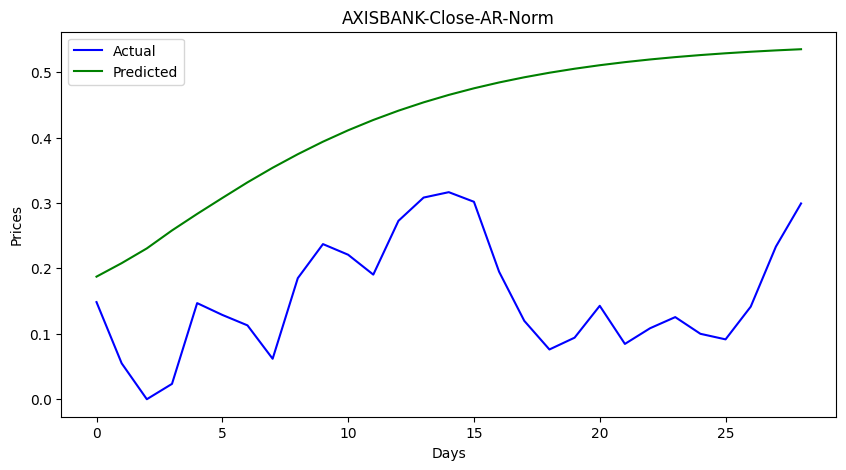

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(test["Close"].values, color='blue', label="Actual")
plt.plot(forecast_df["Close"].values, color='green', label="Predicted")
plt.title("AXISBANK-Close-AR-Norm")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()

In [16]:
actual_stock_price_test_ori = scaler.inverse_transform(test)
actual_stock_price_test_ori_df = pd.DataFrame(actual_stock_price_test_ori, columns=["Open", "High", "Low", "Close"])

In [17]:
actual_stock_price_test_ori_df

,Open,High,Low,Close
0,686.000000,687.000000,676.549988,679.900024
1,669.000000,674.900024,660.450012,661.750000
2,665.049988,665.450012,649.349976,651.099976
3,648.000000,677.450012,648.000000,655.650024
4,664.900024,681.400024,660.000000,679.599976
5,675.000000,678.799988,668.049988,676.099976
6,679.099976,687.349976,671.000000,673.000000
7,674.000000,678.750000,661.150024,663.099976
8,672.000000,691.549988,670.000000,687.000000
9,695.000000,701.549988,687.650024,697.099976


In [18]:
predicted_stock_price_test_ori = scaler.inverse_transform(forecast_df)
predicted_stock_price_test_ori_df = pd.DataFrame(predicted_stock_price_test_ori, columns=["Open", "High", "Low", "Close"])

In [19]:
predicted_stock_price_test_ori_df

,Open,High,Low,Close
0,684.918348,692.310870,679.608562,687.450868
1,687.654046,694.395701,683.772401,691.451509
2,691.286192,699.173239,689.624003,695.825206
3,695.563603,703.549711,694.665396,701.152179
4,700.921188,708.564216,699.612233,706.054692
5,705.770073,713.488423,704.527692,710.774434
6,710.574719,718.279318,709.010227,715.411032
7,715.271533,722.910641,713.270172,719.740164
8,719.668809,727.294034,717.223534,723.758375
9,723.766127,731.356423,720.822376,727.471828


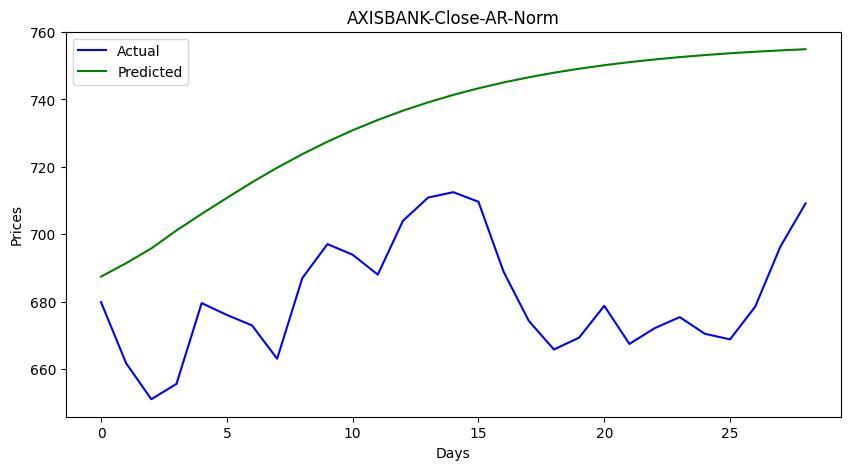

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(actual_stock_price_test_ori_df["Close"], color='blue', label="Actual")
plt.plot(predicted_stock_price_test_ori_df["Close"], color='green', label="Predicted")
plt.title("AXISBANK-Close-AR-Norm")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()

In [21]:
rmse_ori = mean_squared_error(actual_stock_price_test_ori_df["Close"], predicted_stock_price_test_ori_df["Close"], squared=False)
mape_ori = mean_absolute_percentage_error(actual_stock_price_test_ori_df["Close"], predicted_stock_price_test_ori_df["Close"])
print("RMSE-Testset (Original):", rmse_ori)
print("MAPE-Testset (Original):", mape_ori)

RMSE-Testset (Original): 56.48921839757095
MAPE-Testset (Original): 0.07680116224804263


In [22]:
forecast_steps = 3  # Adjust as needed
forecast_future = result.forecast(result.endog, steps=forecast_steps)
forecast_future_df = pd.DataFrame(forecast_future, columns=["Open", "High", "Low", "Close"])

In [23]:
forecast_steps

3

In [24]:
forecast_future

array([[0.18422327, 0.13333758, 0.17812657, 0.18737573],
       [0.19787445, 0.14368671, 0.20159142, 0.2079976 ],
       [0.21599894, 0.16740245, 0.23456748, 0.23054242]])

In [25]:
forecast_future_df

,Open,High,Low,Close
0,0.184223,0.133338,0.178127,0.187376
1,0.197874,0.143687,0.201591,0.207998
2,0.215999,0.167402,0.234567,0.230542


In [26]:
forecast_future_prices = scaler.inverse_transform(forecast_future_df)
forecast_future_prices_df = pd.DataFrame(forecast_future_prices, columns=["Open", "High", "Low", "Close"])

# Save forecasted prices
forecast_future_prices_df.to_csv("CloseVARForecast.csv", index=False)

In [27]:
forecast_future_prices_df

,Open,High,Low,Close
0,684.918348,692.310870,679.608562,687.450868
1,687.654046,694.395701,683.772401,691.451509
2,691.286192,699.173239,689.624003,695.825206


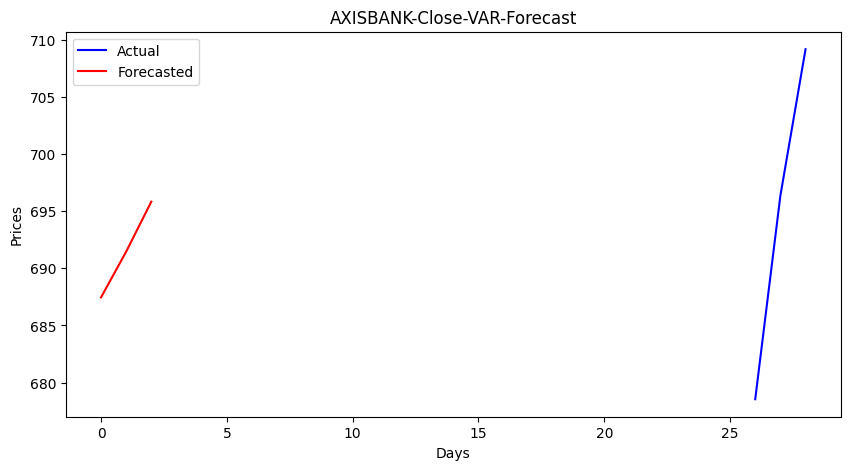

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(actual_stock_price_test_ori_df["Close"].iloc[-forecast_steps:], color='blue', label="Actual")
plt.plot(forecast_future_prices_df["Close"], color='red', label="Forecasted")
plt.title("AXISBANK-Close-VAR-Forecast")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()